Импорты библиотек

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import t

Подготовка данных

In [177]:
oil_df = pd.read_excel("oil_price.xlsx", sheet_name="oil")[["Date", "Adj Close**"]].rename(columns={"Adj Close**": "oil_price"})
usd_rub_df = pd.read_excel("oil_price.xlsx", sheet_name="rub_usd")[["Date", "Adj Close**"]].rename(columns={"Adj Close**": "usd_rub_curr"})
data = pd.merge(oil_df, usd_rub_df, on='Date', how='inner')

x = data["oil_price"]
y = data["usd_rub_curr"]


Код функции нахождения коэффициентов регрессии

In [178]:
# Функция, возвращающая выборочное среднее
def sample_mean(sample):
    mean_s = 0
    for s in sample:
        mean_s += s

    return mean_s / len(sample)

# Функция, возвращающая выборочную дисперсию
def sample_var(sample):
    mean_s = sample_mean(sample)
    var_s = 0
    for s in sample:
        var_s += (s - mean_s) ** 2

    return var_s / len(sample)

# Функция, возвращающая ковариацию
def cov(x, y):

    sub_x = [i - sample_mean(x) for i in x]
    sub_y = [i - sample_mean(y) for i in y]
    numerator = 0
    for i in range(len(x)):
        numerator += sub_x[i] * sub_y[i]

    return numerator / (len(x) - 1)

# Функция, возвращающая параметры коэф. a* и b* линейной регрессии прямой y = a*x + b*
def get_regression_koef(x, y):
    # Находим выборочное матожидание для x и y, а также дисперсию для x
    mean_x = sample_mean(x)
    mean_y = sample_mean(y)
    var_x = sample_var(x)

 # нахождение ковариации для x, y
    cov_xy = cov(x, y)

    # коэффициент a* и b*
    a = cov_xy / var_x
    b = mean_y - cov_xy / var_x * mean_x
    return a, b



# Задание 3

Находим уравнение регрессии

In [179]:
# передаем функции наши эксперементальные данные и получаем уравнение регрессии
a, b = get_regression_koef(x, y)
y_regr = a * x + b
print(f"уравнение регрессии: у={a:.{2}f}x + {b:.{2}f}")

уравнение регрессии: у=0.76x + 21.66


Строим график линейной регрессии

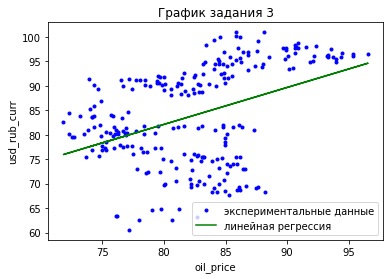

In [180]:
# отрисовка графика
plt.plot(x.values, y.values, 'b.', label='экспериментальные данные')
plt.plot(x.values, y_regr.values, 'g', label='линейная регрессия')
# название осей и легенда
plt.xlabel("oil_price")
plt.ylabel("usd_rub_curr")
plt.title("График задания 3")
plt.legend()

plt.show()

Находим значимость параметров

In [181]:
T_table = t.ppf(0.95, len(x)-2-1)

Sres = math.sqrt(sum((y - y_regr) ** 2) / (len(y)-1-1))

Sa = Sres / (math.sqrt(len(x))  * x.std())
Sb = Sres * math.sqrt(sum(x ** 2)) / (len(x) * x.std()) 

Ta = a / Sa
Tb = b / Sb

print(f"Табличное значение t-критерия, t(табл)={T_table}")
print(f"Фактическое значение t-критерия параметра a, t(a)={Ta}")
print(f"Фактическое значение t-критерия параметра b, t(b)={Tb}")


Табличное значение t-критерия, t(табл)=1.6510713448508132
Фактическое значение t-критерия параметра a, t(a)=6.976800404691247
Фактическое значение t-критерия параметра b, t(b)=2.41954200196239


Вывод:

Получено уравнение линейно регрессии у=0.76x + 21.66

Фактическое значение t-критерия параметра a, t(a)=6.98 > t(табл)=1.65, параетр стат. значим

Фактическое значение t-критерия параметра b, t(b)=2.41 > t(табл)=1.65, параетр стат. значим

# Задание 4

Логарифмируем x

In [182]:
x_log = x.apply(lambda x: math.log(x))
y_log = y.apply(lambda y: math.log(y))

Находим уравнение регрессии

In [183]:
# передаем функции наши эксперементальные данные и получаем уравнение регрессии
a, b = get_regression_koef(x_log, y_log)
y_regr = a * x_log + b
print(f"уравнение регрессии: у={a:.{2}f}x + {b:.{2}f}")

уравнение регрессии: у=0.69x + 1.37


Строим график линейной регрессии

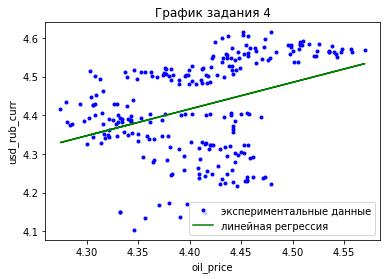

In [184]:
# отрисовка графика
plt.plot(x_log.values, y_log.values, 'b.', label='экспериментальные данные')
plt.plot(x_log.values, y_regr.values, 'g', label='линейная регрессия')
# название осей и легенда
plt.xlabel("oil_price")
plt.ylabel("usd_rub_curr")
plt.title("График задания 4")
plt.legend()

plt.show()

Находим значимость параметров

In [185]:
T_table = t.ppf(0.95, len(x)-1-1)

Sres = math.sqrt(sum((y_log - y_regr) ** 2) / (len(y_log)-1-1))

Sa = Sres / (math.sqrt(len(x_log))  * x_log.std())
Sb = Sres * math.sqrt(sum(x_log ** 2)) / (len(x_log) * x_log.std()) 

Ta = a / Sa
Tb = b / Sb

print(f"Табличное значение t-критерия, t(табл)={T_table}")
print(f"Фактическое значение t-критерия параметра a, t(a)={Ta}")
print(f"Фактическое значение t-критерия параметра b, t(b)={Tb}")


Табличное значение t-критерия, t(табл)=1.6510460767426216
Фактическое значение t-критерия параметра a, t(a)=6.222790381943239
Фактическое значение t-критерия параметра b, t(b)=2.8055387922087487


Вывод:

Получено уравнение линейной регрессии у=0.69x + 1.37 

Фактическое значение t-критерия параметра a, t(a)=6.22 > t(табл)=1.65, параетр стат. значим

Фактическое значение t-критерия параметра b, t(b)=2.81 > t(табл)=1.65, параетр стат. значим